In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Procrastination_dataset_2022_postEDA.csv')
df.drop(['Unnamed: 0', 'tasks put off avg'], inplace=True, axis=1)

In [3]:
df.columns

Index(['put off reading', 'put off evaluation', 'put off review',
       'put off decision-making', 'put off writing report',
       'put off completing documents', 'do not do anything', 'go back to bed',
       'watch TV/films', 'eat/drink', 'talk with friends', 'socialise',
       'walk/exercise', 'tidy room', 'do other less important tasks',
       'talk about what I should do', 'plan what I should do',
       'distracted by entertainment', 'distracted by new projects',
       'importance of task', 'impending deadline', 'too many concurrent tasks',
       'dislike task', 'no interest in task', 'bewildered to purpose of task',
       'task difficulty', 'low self-efficacy'],
      dtype='object')

from ML algorithm, using logistic regression to predict 'low self-efficacy', the seemingly most features by calulating their importances are:<br>
<br>
'put off completing documents'<br>
'distracted by new projects'<br>
'importance of task'<br>
'dislike task'<br>
'bewildered by purpose of task'<br>
'task difficulty'<br>
<br>
these findings are slightly different to when we looked at the data via EDA
<br>
<br>
it would now be interesting to compare see how well these 'signigicant' features can by themeselves preserve and predict the data

<br>
<br>

## predicting 'low self-efficacy' as the target variable

### logistic

### using significant features to predict outcome

In [4]:
df.columns

Index(['put off reading', 'put off evaluation', 'put off review',
       'put off decision-making', 'put off writing report',
       'put off completing documents', 'do not do anything', 'go back to bed',
       'watch TV/films', 'eat/drink', 'talk with friends', 'socialise',
       'walk/exercise', 'tidy room', 'do other less important tasks',
       'talk about what I should do', 'plan what I should do',
       'distracted by entertainment', 'distracted by new projects',
       'importance of task', 'impending deadline', 'too many concurrent tasks',
       'dislike task', 'no interest in task', 'bewildered to purpose of task',
       'task difficulty', 'low self-efficacy'],
      dtype='object')

In [5]:
# features and labels

X = df.drop(['put off reading', 'put off evaluation', 'put off review',
       'put off writing report',
       'put off completing documents', 'do not do anything', 'go back to bed',
       'watch TV/films', 'eat/drink', 'talk with friends', 'socialise',
       'walk/exercise', 'tidy room', 'do other less important tasks',
       'talk about what I should do', 'plan what I should do',
       'distracted by entertainment',
       'impending deadline', 'too many concurrent tasks',
       'no interest in task',
       'low self-efficacy'], axis=1).values
y = df['low self-efficacy'].values

y = y.reshape(-1,1)

In [6]:
# creating algorithm - logistic regression model
logis_reg = LogisticRegression()

In [7]:
# separating the data into training/testing
# 0.2 = 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [8]:
# training the model
logis_model = logis_reg.fit(X_train, y_train)

/Users/dominiclai/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
logis_predictions = logis_model.predict(X_test)
print("predictions: ", logis_predictions)

predictions:  [1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0]


<br>

#### accuracy of logis reg

In [10]:
# we use 'score' to obtain the accuracy of the model
logis_score = logis_model.score(X_test, y_test)

In [11]:
print("logis_score (accuracy): ", logis_score)

logis_score (accuracy):  0.6666666666666666


In [12]:
# mean squared error value - score
print("MSE: ", mean_squared_error(y_test, logis_predictions))

MSE:  0.3333333333333333


<br>

#### plotting importance/significance of features

In [13]:
# coefficient
print("coefficient: ", logis_reg.coef_)

coefficient:  [[-0.00194732  0.26108361  0.72674647 -0.28675316  0.46534513  1.29736446]]


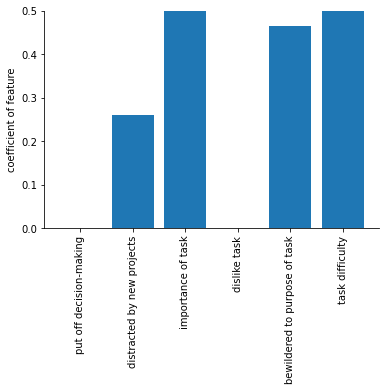

In [14]:
X_features = df.drop(['put off reading', 'put off evaluation', 'put off review',
       'put off writing report',
       'put off completing documents', 'do not do anything', 'go back to bed',
       'watch TV/films', 'eat/drink', 'talk with friends', 'socialise',
       'walk/exercise', 'tidy room', 'do other less important tasks',
       'talk about what I should do', 'plan what I should do',
       'distracted by entertainment',
       'impending deadline', 'too many concurrent tasks',
       'no interest in task',
       'low self-efficacy'], axis=1)

feature = X_features.columns
feature_significance = logis_reg.coef_[0]

# creating a new pandas dataframe to be able to compare the coefficients
df_feature_significance = pd.DataFrame({'feature': feature, 'feature_significance': feature_significance})

plt.bar(df_feature_significance.feature, df_feature_significance.feature_significance)
plt.xticks(rotation=90)
plt.ylim(0,0.5)
plt.ylabel('coefficient of feature')
sns.despine()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>